#  Original and Mask Images Prepare

In [66]:
from PIL import Image
import os

import numpy as np

def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

def pre_images(resize_shape,path):
    dirs=os.listdir(path)
    sizes=np.zeros([len(dirs),2])
    dirs.sort()
    images=img=Image.open(path+dirs[0])
    sizes[0,:]=images.size
    images=(images.resize((resize_shape),Image.ANTIALIAS))
    images=convert_one_channel(np.asarray(images))
    for i in range (1,len(dirs)):
        x = i + 1
        img=Image.open(path+str(x)+'.png')
        sizes[i,:]=img.size
        img=img.resize((resize_shape),Image.ANTIALIAS)
        img=convert_one_channel(np.asarray(img))
        images=np.concatenate((images,img))
    images=np.reshape(images,(len(dirs),resize_shape[0],resize_shape[1],1))
    return images,sizes

In [67]:
! git clone https://github.com/RobertSmithers/3DTeethSegmentation.git

fatal: destination path '3DTeethSegmentation' already exists and is not an empty directory.


In [68]:
import sys
sys.path.append("/content/3DTeethSegmentation")

In [69]:
%cd '/content/3DTeethSegmentation/'

/content/3DTeethSegmentation


In [70]:
og_path1 = '/content/3DTeethSegmentation/3DTeethSegmentation/data/original_img/'
masked_path2 = '/content/3DTeethSegmentation/3DTeethSegmentation/data/masked_img/'

og_img, size1 = pre_images((512, 512), og_path1)
print(og_img.shape)
mask_img, size2 = pre_images((512, 512), masked_path2)

(116, 512, 512, 1)


In [71]:
og_img = np.float32(og_img/255)
mask_img = np.float32(mask_img/255)


x_train=og_img[:117,:,:,:]
y_train=mask_img[:117,:,:,:]
x_test=og_img[117:,:,:,:]
y_test=mask_img[117:,:,:,:]

#View a specific original image and its masked image


#Note: There are 116 original images (1.png to 116.png)
#x_train=og_img[desired_image_number - 1,:,:,:]
#y_train=mask_img[desired_image_number - 1,:,:,:]

# so if you want to see image 116.png do:
#x_train=og_img[115,:,:,:]

# Testing

109


(-0.5, 511.5, 511.5, -0.5)

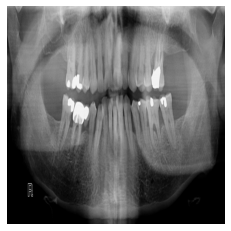

In [79]:
#Check
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,116)
print(random_number)

#Checking data X and Y matching

#Shows img of random_number+1
plt.imshow(x_train[random_number,:,:,0], cmap = 'gray')
plt.axis('off')

#Example shows 110.png

109


(-0.5, 511.5, 511.5, -0.5)

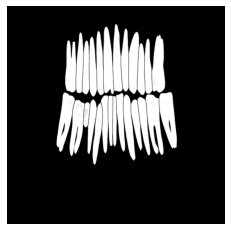

In [80]:
#Checking data X and Y matching
print(random_number)

#Shows img of random_number+1
plt.imshow(y_train[random_number,:,:,0], cmap = 'gray')
plt.axis('off')

#Example shows 110.png